In [1]:
## pycistarget terminal version

import warnings
warnings.simplefilter(action = 'ignore')
import pycisTopic
pycisTopic.__version__
import numpy as np
import pandas as pd

projDir = '/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/dm6/'
outDir = projDir + 'output/'
import os
if not os.path.exists(outDir):
    os.makedirs(outDir)
tmpDir = '/media/ggj/FYT/CH/tmp/'
if not os.path.exists(tmpDir):
    os.makedirs(tmpDir)

In [2]:
saveDir = outDir + 'scenicplus/'
if not os.path.exists(saveDir):
    os.mkdir(saveDir)

In [3]:
# Downstream analysis
import pickle
infile = open(saveDir + 'scplus_obj_total.pkl', 'rb')
scplus_obj = pickle.load(infile)
infile.close()

In [4]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 410 x 621 and n_cells x n_regions = 410 x 49236
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_cell:'lineage'
	menr:'CTX_DARs_All'
	dr_cell:'eRegulons_UMAP', 'eRegulons_tSNE'

In [5]:
len(list(set(scplus_obj.uns['eRegulon_metadata_filtered']['Region'])))

1481

In [6]:
len(list(set(scplus_obj.uns['eRegulon_metadata_filtered']['Gene'])))

475

2023-04-25 02:52:30,079 cisTopic     INFO     Calculating mean
2023-04-25 02:52:30,081 cisTopic     INFO     Calculating variance


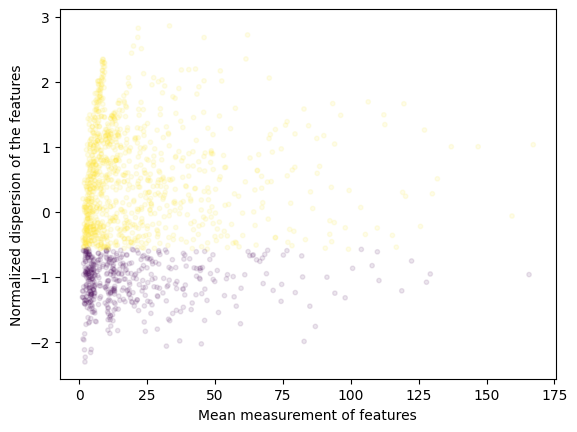

2023-04-25 02:52:30,361 cisTopic     INFO     Done!
2023-04-25 02:52:30,369 cisTopic     INFO     Calculating mean
2023-04-25 02:52:30,371 cisTopic     INFO     Calculating variance


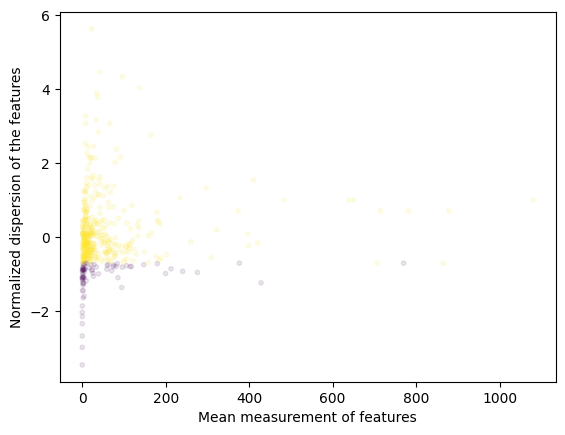

2023-04-25 02:52:30,509 cisTopic     INFO     Done!


In [7]:
from pycisTopic.diff_features import find_highly_variable_features
hvr = find_highly_variable_features(scplus_obj.to_df('ACC').loc[list(set(scplus_obj.uns['eRegulon_metadata_filtered']['Region']))], n_top_features=1000, plot = True)
hvg = find_highly_variable_features(scplus_obj.to_df('EXP')[list(set(scplus_obj.uns['eRegulon_metadata_filtered']['Gene']))].T, n_top_features=400, plot = True)

In [10]:
#all
from scenicplus.networks import create_nx_tables, create_nx_graph, plot_networkx, export_to_cytoscape
nx_tables = create_nx_tables(
    scplus_obj = scplus_obj,
    eRegulon_metadata_key ='eRegulon_metadata_filtered',
    subset_eRegulons = ['lov','Foxp','sr','ab','hb','fd59A','Trl','hb','nom','GATAe','srp','grh'],
    subset_regions = hvr,
    subset_genes = hvg,
    add_differential_gene_expression = True,
    add_differential_region_accessibility = True,
    differential_variable = ['lineage'])

... storing 'lineage' as categorical
... storing 'lineage' as categorical
... storing 'lineage' as categorical


In [12]:
G, pos, edge_tables, node_tables = create_nx_graph(nx_tables,
                   use_edge_tables = ['TF2R','R2G'],
                   color_edge_by = {'TF2R': {'variable' : 'TF', 'category_color' : {'lov': 'sandybrown', 'Foxp': 'Purple','sr': 'darkred','ab':'brown','hb':'y','fd59A': 'sandybrown', 'Trl': 'Purple','hb': 'powderblue','nom':'brown','GATAe':'steelblue','srp': 'sandybrown', 'grh': 'Purple'}},
                                    'R2G': {'variable' : 'R2G_rho', 'continuous_color' : 'viridis', 'v_min': -1, 'v_max': 1}},
                   transparency_edge_by =  {'R2G': {'variable' : 'R2G_importance', 'min_alpha': 0.1, 'v_min': 0}},
                   width_edge_by = {'R2G': {'variable' : 'R2G_importance', 'max_size' :  1.5, 'min_size' : 1}},
                   color_node_by = {'TF': {'variable': 'TF', 'category_color' : {'lov': 'sandybrown', 'Foxp': 'Purple','sr': 'darkred','ab':'brown','hb':'y','fd59A': 'sandybrown', 'Trl': 'Purple','hb': 'powderblue','nom':'brown','GATAe':'steelblue','srp': 'sandybrown', 'grh': 'Purple'}},
                                    'Gene': {'variable': {'lineage_Log2FC_Fatbody'}, 'continuous_color' : 'bwr'},
                                    'Region': {'variable': {'lineage_Log2FC_Fatbody'}, 'continuous_color' : 'viridis'}},
                   transparency_node_by =  {'Region': {'variable' : {'lineage_Log2FC_Fatbody'}, 'min_alpha': 0.1},
                                    'Gene': {'variable' : {'lineage_Log2FC_Fatbody'}, 'min_alpha': 0.1}},
                   size_node_by = {'TF': {'variable': 'fixed_size', 'fixed_size': 30},
                                    'Gene': {'variable': 'fixed_size', 'fixed_size': 15},
                                    'Region': {'variable': 'fixed_size', 'fixed_size': 10}},
                   shape_node_by = {'TF': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Gene': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Region': {'variable': 'fixed_shape', 'fixed_shape': 'diamond'}},
                   label_size_by = {'TF': {'variable': 'fixed_label_size', 'fixed_label_size': 20.0},
                                    'Gene': {'variable': 'fixed_label_size', 'fixed_label_size': 10.0},
                                    'Region': {'variable': 'fixed_label_size', 'fixed_label_size': 0.0}},
                   layout='kamada_kawai_layout',
                   scale_position_by=250)

In [13]:
import matplotlib.pyplot as plt

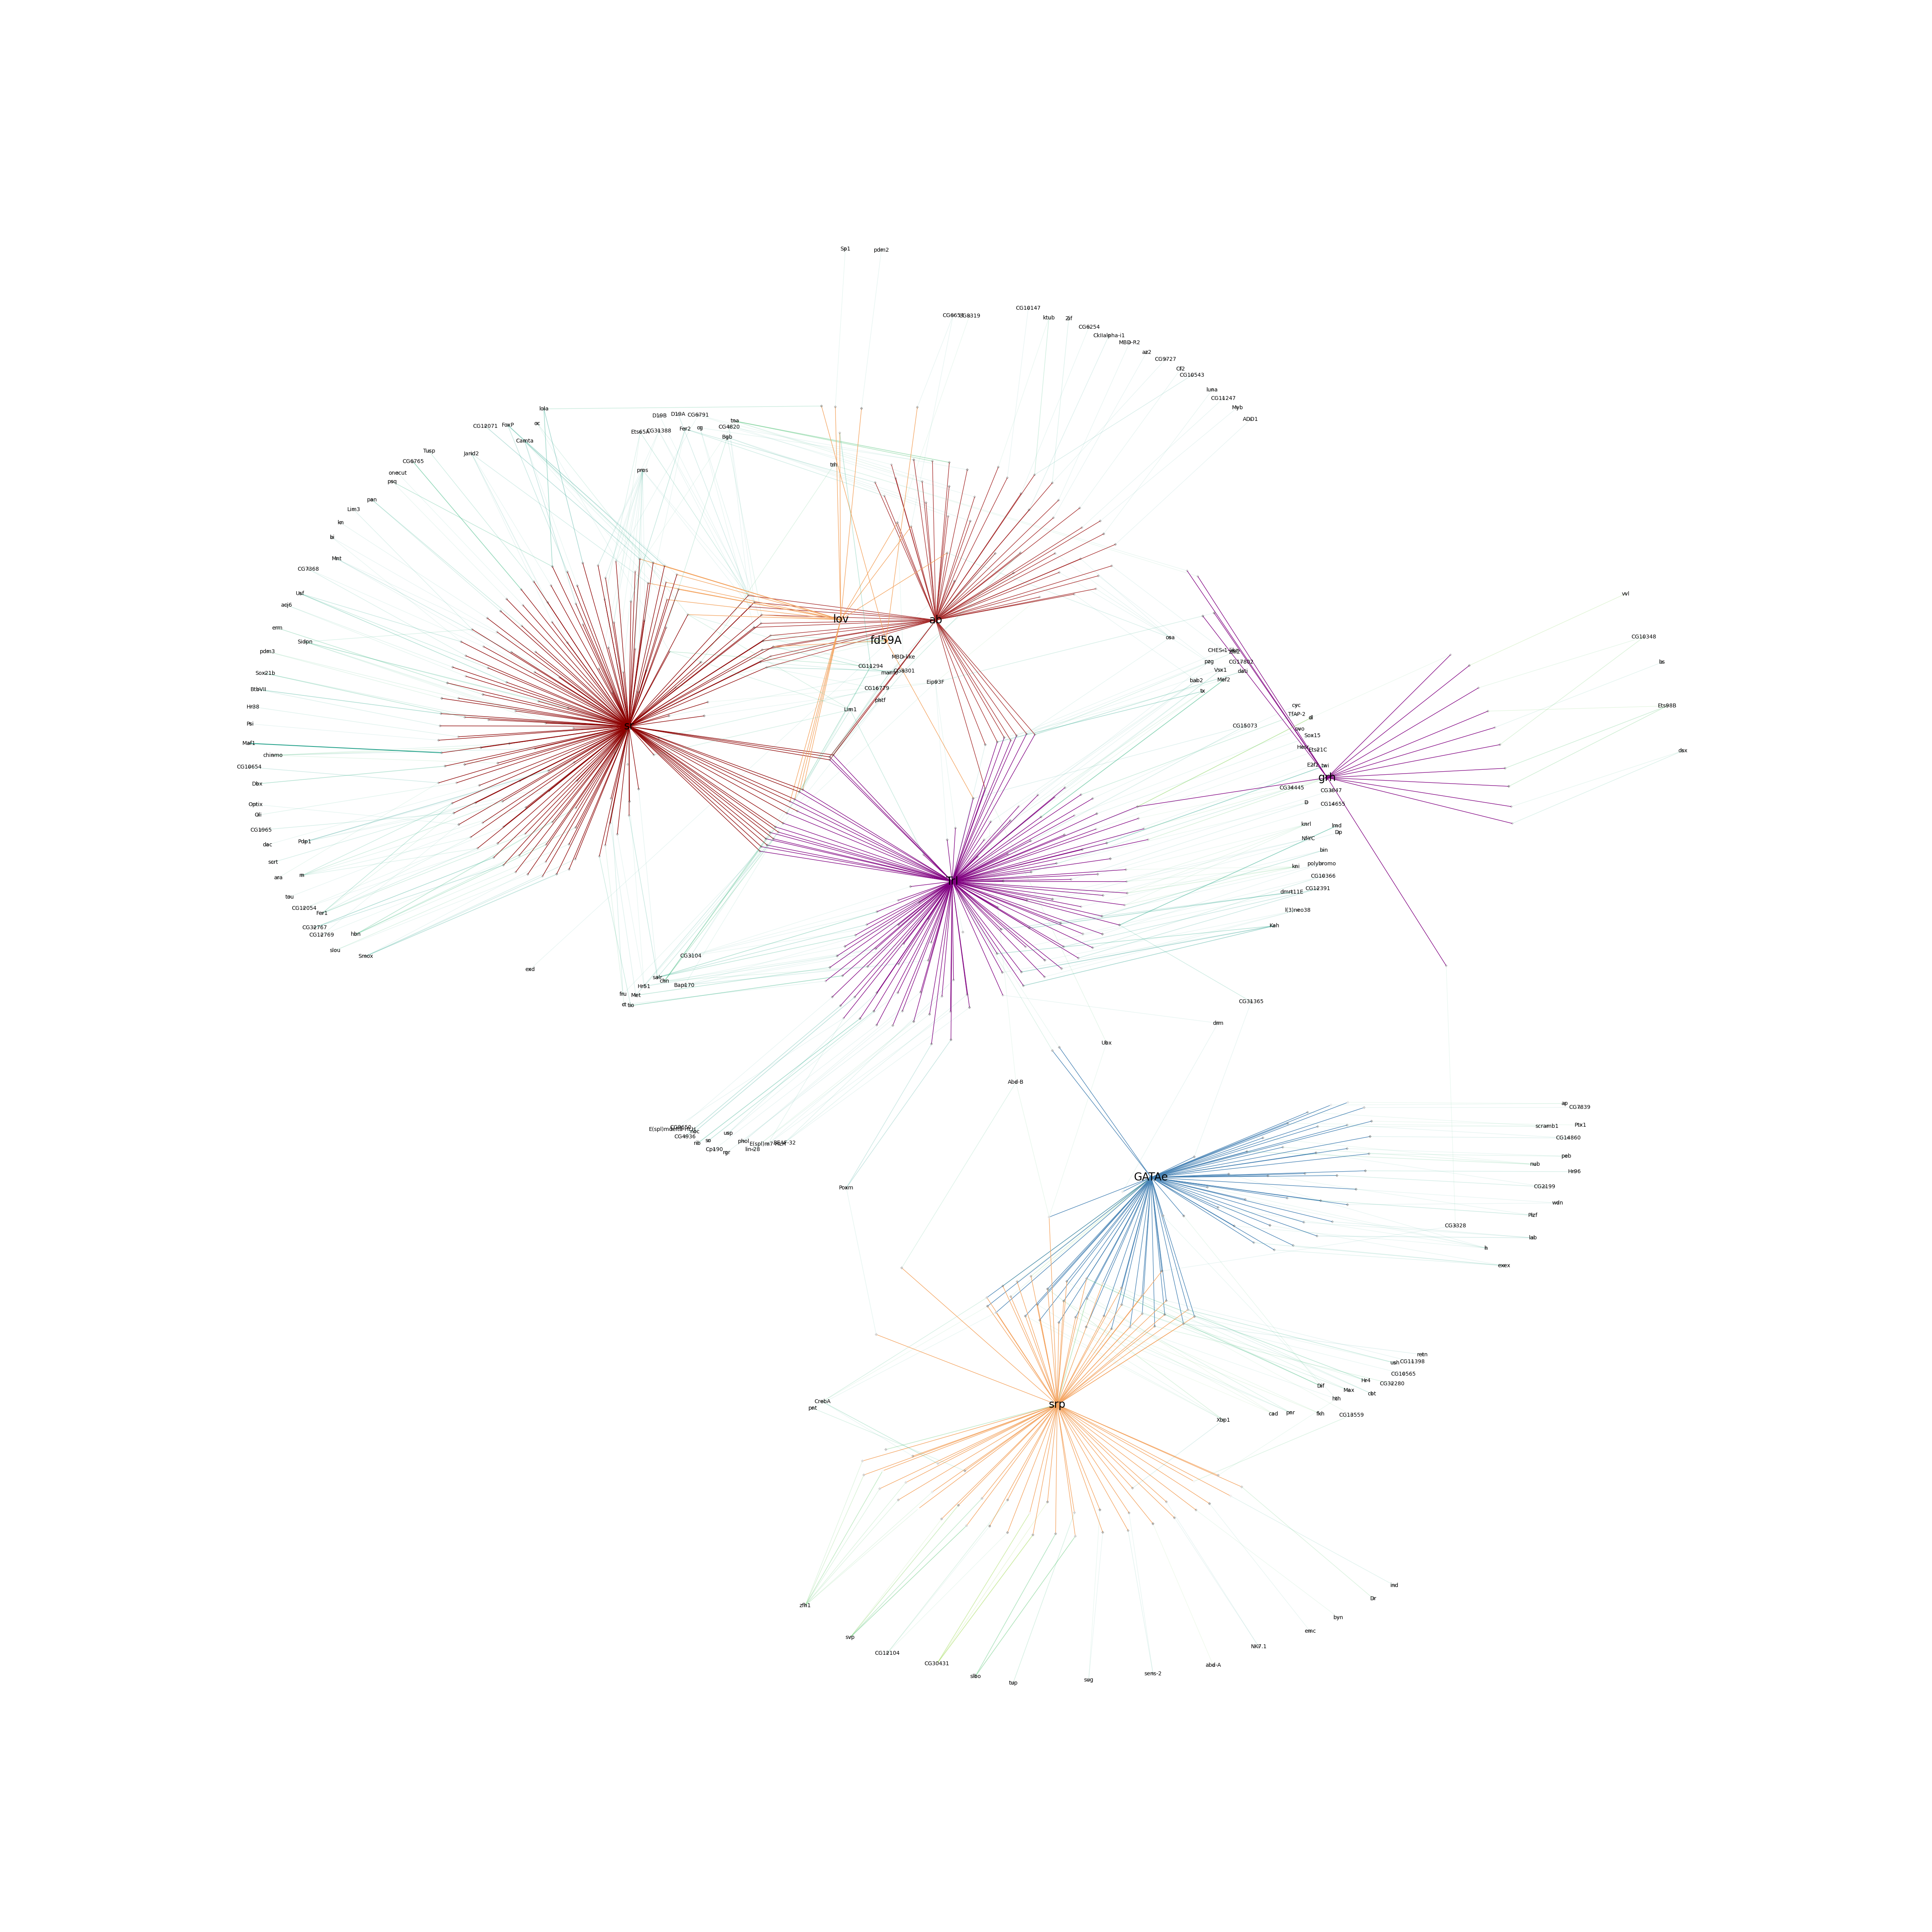

In [14]:
plt.figure(figsize=(50,50))
plot_networkx(G, pos)
plt.show()

In [15]:
export_to_cytoscape(G,pos,out_file='./network_dm_total.cyjs')